In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading a CSV File from the local directory.

In [2]:
file_path = '/Users/phani/Downloads/Financial_Dataset_Capstone.csv'
df = pd.read_csv(file_path)

In [3]:
df.shape

(6362620, 11)

Our data contains 6362620 rows over 11 colums

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The above step will show us the statistical summary

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Now we will check the null or missing values from the data set and see what we need to do from the output

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

It is clearly shown that our data has no null or missing values. Now we are good to go with the next step of Exploratory Data Analysis.

# Exploratory Data Analysis

In [8]:
df.drop_duplicates(inplace = True)

If there is any duplicates they will be dropped from the Dataframe.

In [9]:
df.shape

(6362620, 11)

This is the final shape of the df adter dropping the duplicates.

In [10]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

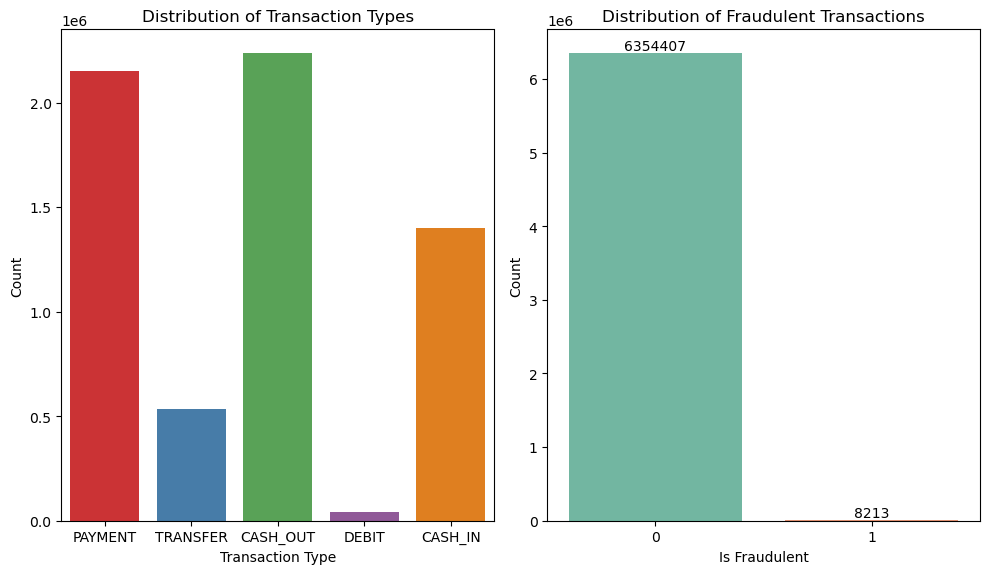

In [12]:
fraud_counts = df['isFraud'].value_counts()
transaction_type_counts = df['type'].value_counts()


plt.figure(figsize=(10, 6))

'''
# distribution plot of Amountplt.subplot(1, 3, 1)
sns.histplot(df['amount'], bins=20, kde=True, color='blue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')'''

# Plot for Distribution of Transaction Types
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type', palette='Set1')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

#Plot For Distribution of Fradualent transactions.
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='isFraud', palette='Set2')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
for i, count in enumerate(fraud_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The data is highly imbalanced as the fraud transactions are just 13% when compare and our class variable contains data which is highly skewed towards the flag value 0, which would indeed affect any models we might train on this dataset.

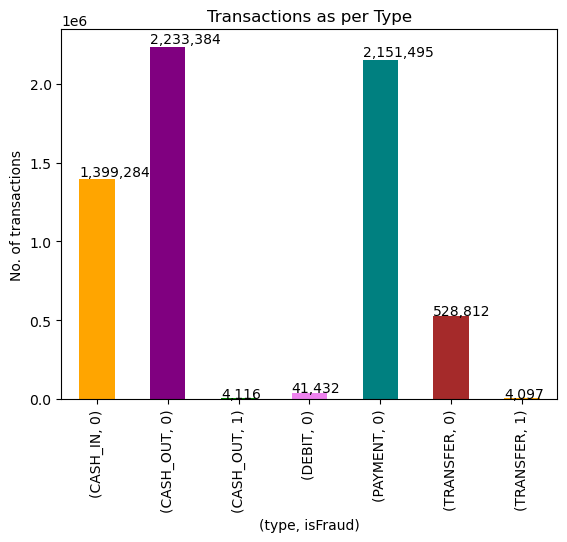

In [13]:
axes = df.groupby(['type', 'isFraud']).size().plot.bar(color = {'violet', 'green', 'purple', 'orange', 'teal', 'brown'})
axes.set_title('Transactions as per Type')
axes.set_xlabel('(type, isFraud)')
axes.set_ylabel('No. of transactions')
for p in axes.patches:
    axes.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

From the above plot we can say that only "CASH_OUT" and "TRANSFER" has the frauds data wherein all the other types didn't show any fraudulent behavior. So we will mainly focus on these categories.

In [14]:
categories_to_remove = ['CASH_IN', 'PAYMENT', 'DEBIT']
old_df = df
df = df[~df['type'].isin(categories_to_remove)]

In [15]:
df.shape

(2770409, 11)

In [16]:
df.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

Now our data frame was reduced to less that 50% of the original data i.e., from >6mil to 2.7mil. 

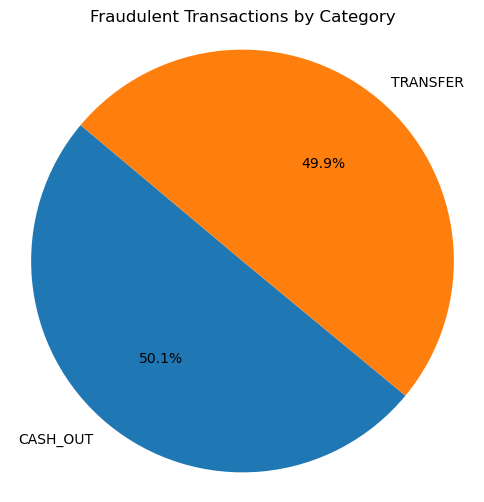

In [17]:
fraudulent_transactions = df[df['isFraud'] == 1]
fraudulent_counts = fraudulent_transactions['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraudulent_counts, labels=fraudulent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fraudulent Transactions by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

From the above pie chart, we can clearly say that percentage of fradulent transactions in bith the categories are almost similar.

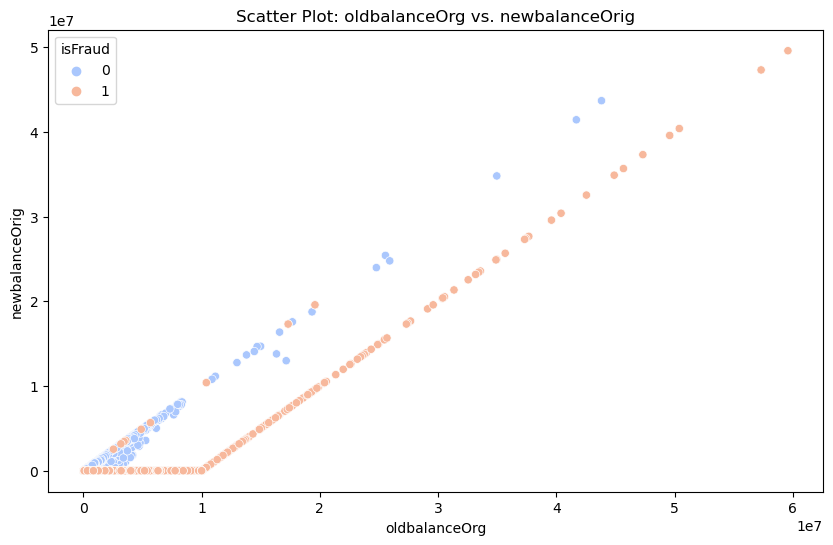

In [18]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', palette='coolwarm')
plt.title('Scatter Plot: oldbalanceOrg vs. newbalanceOrig')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.show()

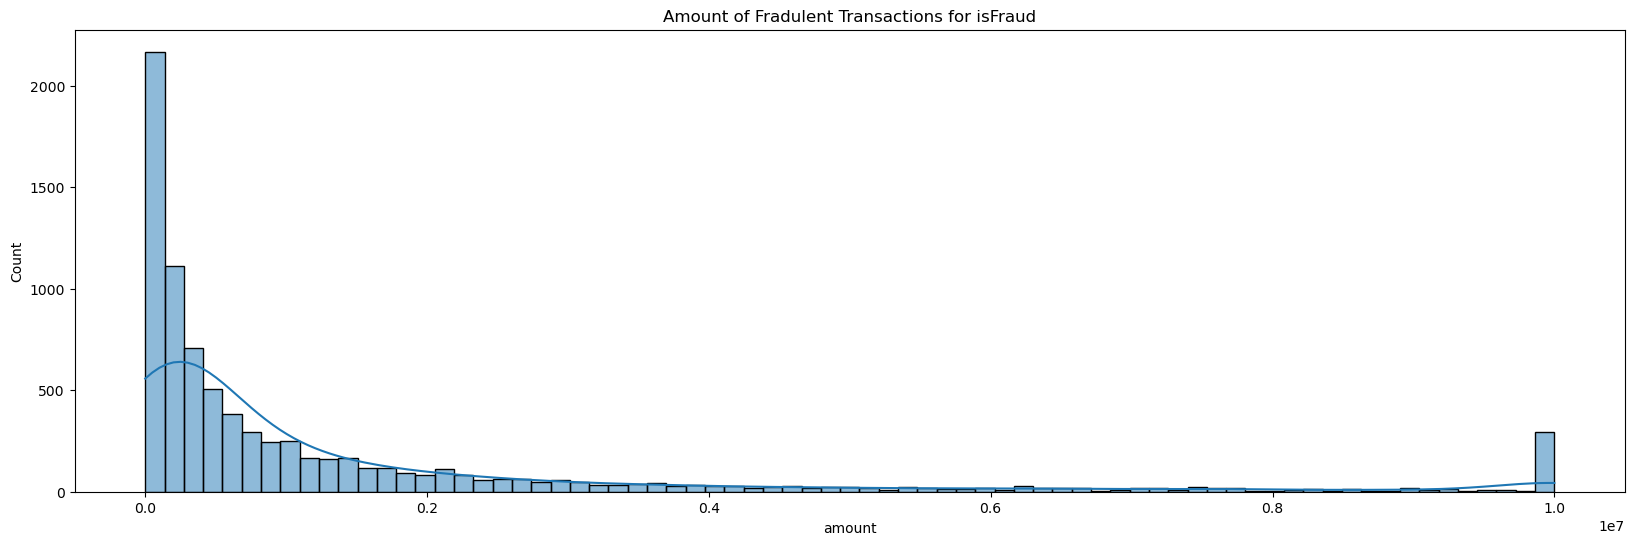

In [19]:
figure = plt.subplots(figsize = (20, 6))
ax = sns.histplot(data=df[df['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')
plt.show()

/var/folders/q9/x3v31xns0jqfmcdmgv_3tztr0000gn/T/ipykernel_65702/3425481517.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


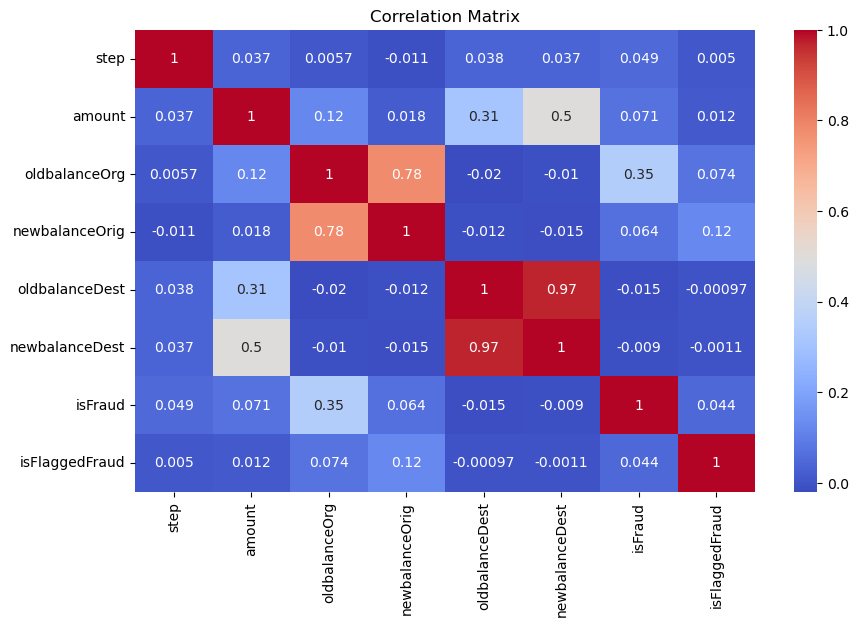

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()